# Урок 1. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [15]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [16]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [14]:
import numpy as np
import pandas as pd

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [55]:
iris_dataset_1 = pd.DataFrame(np.concatenate([iris_dataset.data[:, 0:1], iris_dataset.data[:, 2:4]], axis=1), 
                              columns=(iris_dataset.feature_names[0], iris_dataset.feature_names[2],iris_dataset.feature_names[3]))
iris_dataset_2 = pd.DataFrame(np.concatenate([iris_dataset.data[:, 1:2], iris_dataset.data[:, 2:4]], axis=1), columns=iris_dataset.feature_names[1:4])
iris_dataset_1

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [43]:
# если работаете в интерактивной оболочке IPython 
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

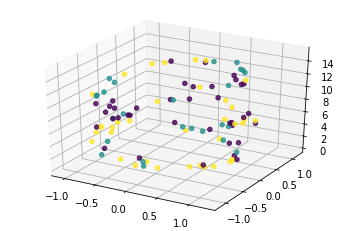

In [44]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

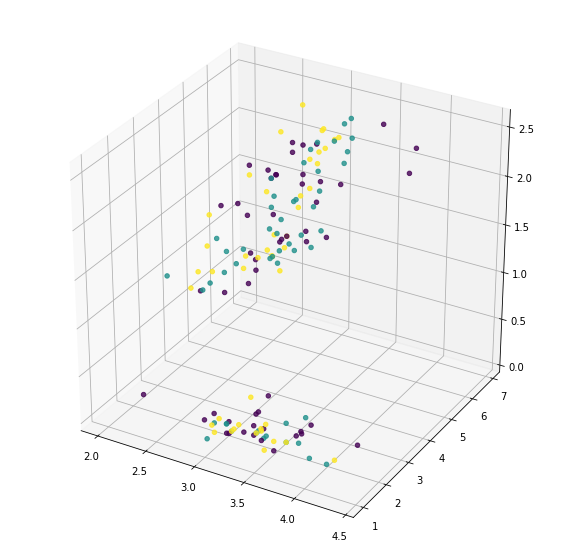

In [54]:
fig, subplot = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
xdata=iris_dataset_2['sepal width (cm)']
ydata=iris_dataset_2['petal length (cm)']
zdata=iris_dataset_2['petal width (cm)']
colors = np.random.randint(3, size=150)
ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)
### YOUR CODE HERE ###

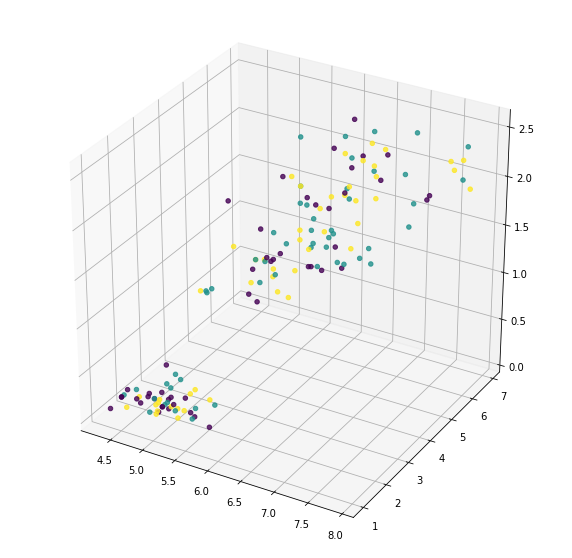

In [58]:
fig, subplot = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
xdata=iris_dataset_1['sepal length (cm)']
ydata=iris_dataset_1['petal length (cm)']
zdata=iris_dataset_1['petal width (cm)']
colors = np.random.randint(3, size=150)
ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

### YOUR CODE HERE ###

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [79]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset.target, random_state=17)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset.target, random_state=17)
classif1=KNeighborsClassifier(n_neighbors=5).fit(x_train_1, y_train_1)
classif2=KNeighborsClassifier(n_neighbors=5).fit(x_train_2, y_train_2)
y_pred_1=classif1.predict(x_test_1)
y_pred_2=classif2.predict(x_test_2)

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [80]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [91]:
### YOUR CODE HERE ###
def classifier_accuracy(features, target, n_neighbors):
    accuracies=[]
    for i in range (1,n_neighbors+1):
        x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features, target, random_state=17)
        classif1=KNeighborsClassifier(n_neighbors=i).fit(x_train_1, y_train_1)
        y_pred_1=classif1.predict(x_test_1)
        accuracies.append(accuracy_score(y_test_1, y_pred_1))
    print (f'Лучшая точность = {max(accuracies)} при n_neighbors = {accuracies.index(max(accuracies))+1}')
    

classifier_accuracy(iris_dataset_1,iris_dataset.target,20)

Лучшая точность = 0.9736842105263158 при n_neighbors = 1
